In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sb

import binary_formation_distribution_V8 as myscript
import NT_disk_Eqns_V1 as jscript
import pagn.constants as ct



In [16]:
c=663176

dir=f'EMRIs_Jupiter_2/c_{c}/SG/alpha_0.01/'

filename = f"EMRIs_Jupiter_2/c_{c}/SG/alpha_0.01/EMRIs_G23_1g_5000_events_with_GW.txt"

MBH, T = np.genfromtxt("SMBHmass_local_AGNlifetime_pairs.txt", unpack=True, skip_header=3)

In [9]:
def file_opener(filename):
    with open(filename) as f:
        lines = f.readlines()
    header_end = lines.index("Data:\n") + 1
    data = pd.read_csv(filename, delimiter=" ", skiprows=header_end)
    data.columns = [col.strip().replace(",", "") for col in data.columns]
    return data


In [17]:
data=file_opener(filename)

In [18]:
with open(filename) as f:
    lines = f.readlines()

header_end = lines.index("Data:\n") + 1

for i in range (4, header_end-2):
    print(f'{lines[i].split(" = ")[0]}={lines[i].split(" = ")[1]}')

alpha=lines[6].split("= ",1)[1]
alpha=alpha.split('\n')[0]
print(float(alpha))

data = pd.read_csv(filename, delimiter=" ", skiprows=header_end)

data.columns = [col.strip().replace(",", "") for col in data.columns]
print(data.keys())

N=len(data["m1/Msun"])
print(f'Columns: {header_end}, Rows: {N}')


disk_type=SG

torque_type=G23

alpha=0.010

gen=1g

N=5000

M_smbh=4.018

Spin=0.9

T=1.592e-15

0.01
Index(['m1/Msun', 'r0/Rg', 't_gw/Myr', 't_migr/Myr', 'is_emri', 'Ng',
       'R_final/Rg', 'lisa_radii/Rg', 't_lisa/Myr', 't_final/Myr', 'lisa_flag',
       'total_flags'],
      dtype='object')
Columns: 14, Rows: 5000


In [155]:
# for i in range (0, len(data['lisa_flag'])):
#     if data['lisa_flag'][i]==0:
#         print(f'event {i} does not enter LISA band before T_disk')


H0 = 70 * 1000 * ct.yr / (1e6 * ct.pc) #km s^-s Mpc_^-1
t0 = 1.0/H0 
print(t0/1e6)

for i in range (0, N):
    if data['is_emri'][i]==0:
        t_gw=data['t_gw/Myr'][i]
        t_m=data['t_migr/Myr'][i]
        if (min(t_m, t_gw) < t0)==False:
            print(f'event {i} will not inspiral before T_disc, and will not inspiral within t0')

13969.91985629905


In [37]:
MBH=1e6*ct.MSun
m1=10*ct.MSun

rG=ct.G*MBH*(1/(ct.c*ct.c))
Rs = 2*rG

r0=1e4*Rs
Rmin=50*Rs

lisa_flag, lisa_radii=jscript.LISAband_flag(r0, Rmin, MBH, m1)

if lisa_flag!=0:
    print(f'EMRI with SMBH {MBH/ct.MSun:.3e} MSun, SBH {m1/ct.MSun:.3e} MSun enters LISA band at {lisa_radii/rG:.3e} R_G')
elif lisa_flag==0:
    print(f'EMRI doesnt enter LISA band')

EMRI doesnt enter LISA band


In [19]:

groups=data.groupby("total_flags", as_index=True)

# labels= "no inspiral or detection", "detected, no inspiral", "inspiral, no detection", "inspirals and detected"

# for k in range(0, groups.ngroups):
#     group=groups.get_group(k)["r0/Rg"]
#     print(labels[k], group)


colour='plasma'

N=len(data["m1/Msun"])

groups=data.groupby("total_flags", as_index=True)
labels= "no inspiral or detection", "detected, no inspiral", "inspiral, no detection", "inspirals and detected"
labels= ["no inspiral, no mig w/in T_disc, no detection", 
"inspiral, no mig w/in T_disc, no detection", 
"no inspiral, mig w/in T_disc, no detection", 
"inspiral, mig w/in T_disc, no detection", 
"no inspiral, no mig w/in T_disc, detection", 
" inspiral, no mig w/in T_disc, detection", 
"no inspiral, mig w/in T_disc, detection", 
"inspiral, mig w/in T_disc, detection"]

cmap = plt.colormaps[colour]
colors_map = {0: cmap(0.), 1: cmap(1.0/7), 2: cmap(2.0/7), 3: cmap(3.0/7), 4: cmap(4.0/7), 5: cmap(5.0/7), 6: cmap(6.0/7), 7: cmap(7.0/7)}


Mbh=MBH[c]
print(f'{MBH[c]:.1e}')

N=len(data["m1/Msun"])


1.0e+04


0, no inspiral, no mig w/in T_disc, no detection
1, inspiral, no mig w/in T_disc, no detection
2, no inspiral, mig w/in T_disc, no detection
3, inspiral, mig w/in T_disc, no detection
4, no inspiral, no mig w/in T_disc, detection
5,  inspiral, no mig w/in T_disc, detection
6, no inspiral, mig w/in T_disc, detection
7, inspiral, mig w/in T_disc, detection


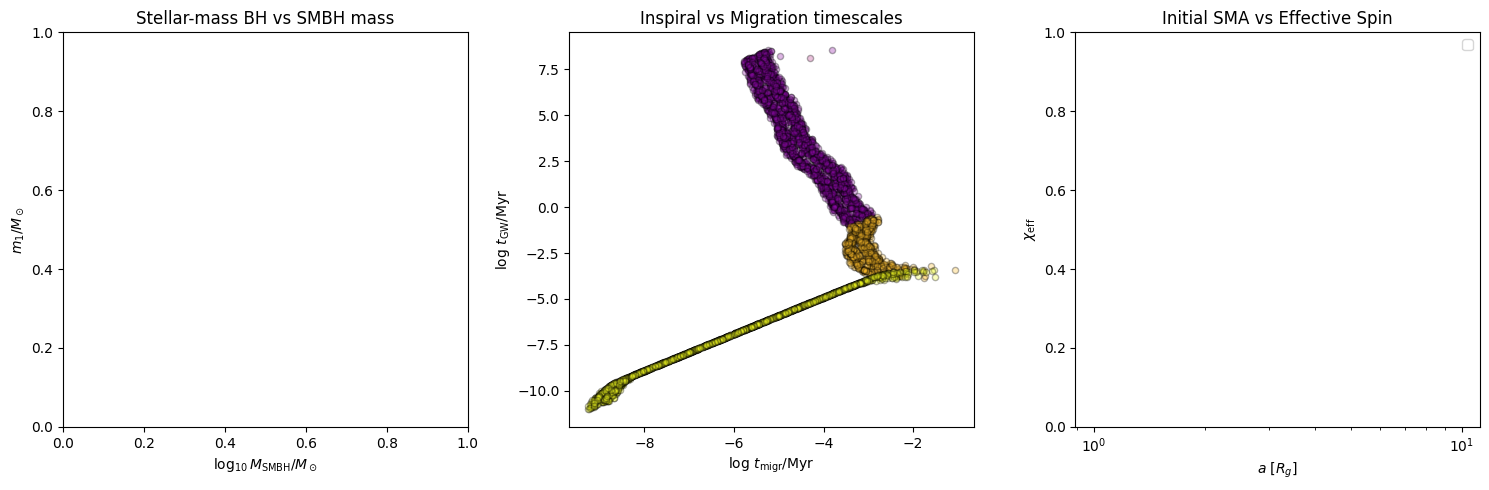

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=100)
i=0

for k in range(0, 8):
    print(f'{k}, {labels[k]}')
    try: 
        axs[i].scatter(groups.get_group(k)["logMBH/Msun"], groups.get_group(k)["m1/Msun"], color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass
# sc1 = axs[i].scatter(data["logMBH/Msun"], data["m1/Msun"], c=data['total_flags'], cmap=colour, alpha=0.6, edgecolor='k', s=20)
axs[i].set_xlabel(r'$\log_{10} M_{\rm SMBH} / M_\odot$')
axs[i].set_ylabel(r'$m_1 / M_\odot$')
axs[i].set_title('Stellar-mass BH vs SMBH mass')

i=1
t_migr = np.log10(data["t_migr/Myr"])
t_gw = np.log10(data["t_gw/Myr"])

for k in range(0, 8):
    try: 
        axs[i].scatter(np.log10(groups.get_group(k)["t_migr/Myr"]), np.log10(groups.get_group(k)["t_gw/Myr"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

# sc2 = axs[i].scatter(t_migr, t_gw, c=data["total_flags"], cmap=colour, alpha=0.6, edgecolor='k', s=20)
# axs[i].plot([min(t_gw.min(), t_migr.min()), max(t_gw.max(), t_migr.max())],
#             [min(t_gw.min(), t_migr.min()), max(t_gw.max(), t_migr.max())],
            # 'k--', label=r'$t_{\rm GW} = t_{\rm migr}$')

axs[i].set_xlabel(r'log $t_{\rm migr}$/Myr')
axs[i].set_ylabel(r'log $t_{\rm GW}$/Myr')
axs[i].set_title('Inspiral vs Migration timescales')

i=2
for k in range(0, 8):
    try: 
        axs[i].scatter(groups.get_group(k)["r0/Rg"], groups.get_group(k)["chi_eff"], color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass
axs[i].set_xlabel(r'$a$ [$R_g$]')
axs[i].set_xscale('log')
axs[i].set_ylabel(r'$\chi_{\rm eff}$')
axs[i].set_title('Initial SMA vs Effective Spin')
# axs[i].legend()
axs[i].legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig(f'{dir}/summary_{N}_SMBH_{Mbh}.pdf')
plt.show()

In [21]:
# Function to make 1 scatter + marginal histograms
def plot_with_marginals(fig, data, x, y, is_emri, xlabel, ylabel, title, logx=False, logy=False):
    g = sb.jointplot(
        data=data,
        x=x, y=y,
        hue=is_emri,
        palette=colors_map,
        alpha=0.5
    )

    g.figure.suptitle(title, y=1.02)
    g.set_axis_labels(xlabel, ylabel)

    if logx:
        g.ax_joint.set_xscale('log')
        g.ax_marg_x.set_xscale('log')
    if logy:
        g.ax_joint.set_yscale('log')
        g.ax_marg_y.set_yscale('log')




<Figure size 600x600 with 0 Axes>

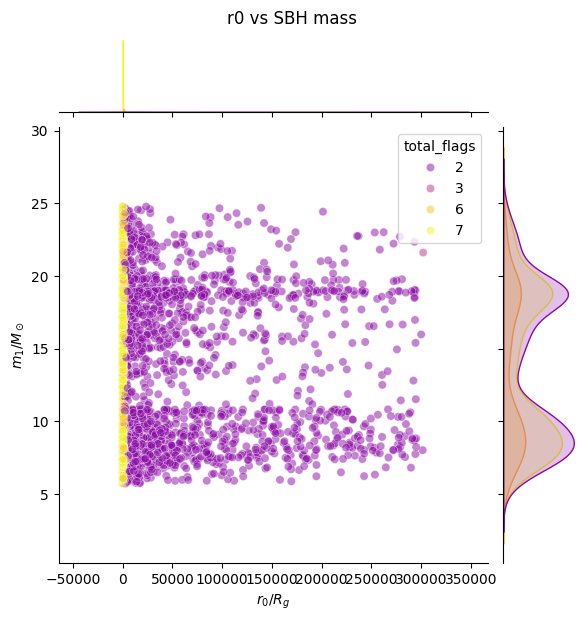

In [22]:
fig = plt.figure(figsize=(6, 6))


# Plot 1: m1 vs logMBH
plot_with_marginals(
    fig, data,
    x="r0/Rg",
    y="m1/Msun",
    is_emri="total_flags",
    xlabel=r'$r_{\rm 0} / R_g$',
    ylabel=r'$m_1 / M_\odot$',
    title='r0 vs SBH mass'
)

fig.tight_layout()
plt.savefig(f'{dir}/r0_{N}_SBH_{Mbh:.1e}.pdf')
plt.show()

<Figure size 600x600 with 0 Axes>

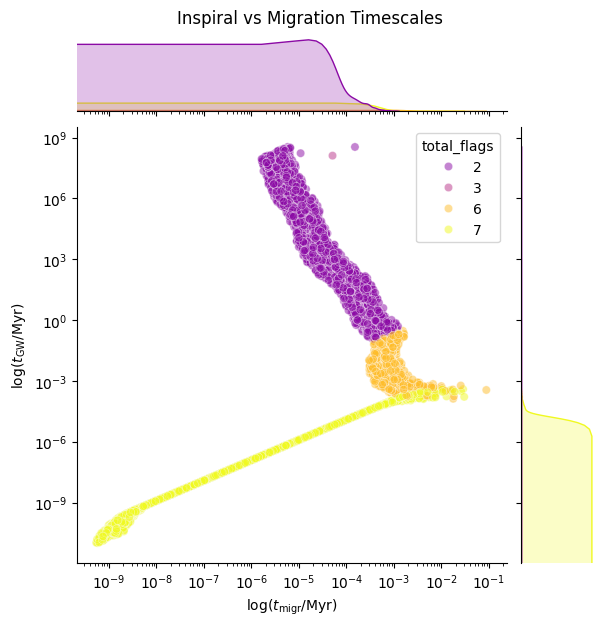

In [23]:
fig = plt.figure(figsize=(6, 6))

# Plot 2: log t_migr vs log t_gw
plot_with_marginals(
    fig, data,
    x="t_migr/Myr",
    y="t_gw/Myr",
    is_emri="total_flags",
    xlabel=r'$\log (t_{\rm migr} / \mathrm{Myr})$',
    ylabel=r'$\log (t_{\rm GW} / \mathrm{Myr})$',
    title='Inspiral vs Migration Timescales',
    logx=True,
    logy=True
)


fig.tight_layout()
plt.savefig(f'{dir}/timescales_{N}_SMBH_{Mbh:.1e}.pdf')
plt.show()

<Figure size 600x600 with 0 Axes>

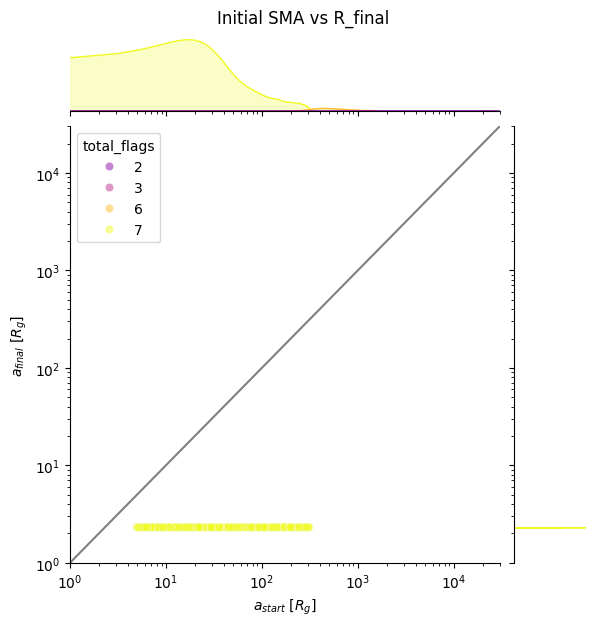

In [24]:
fig = plt.figure(figsize=(6, 6))

# # Plot 3: r0 vs chi_eff
# plot_with_marginals(
#     fig, data,
#     x="r0/Rg",
#     y="lisa_radii/Rg",
#     is_emri="final_flag",
#     xlabel=r'$a_{start}$ [$R_g$]',
#     ylabel=r'$a_{lisa}$ [$R_g$]',
#     title='Initial SMA vs R_final',
#     logx=True,
#     logy=True
# )

plot_with_marginals(
    fig, data,
    x="r0/Rg",
    y="R_final/Rg",
    is_emri="total_flags",
    xlabel=r'$a_{start}$ [$R_g$]',
    ylabel=r'$a_{final}$ [$R_g$]',
    title='Initial SMA vs R_final',
    logx=True,
    logy=True
)

x = np.linspace(1, 1e5, 100)
plt.plot(x, x, c="black", alpha=0.5)

plt.xlim(1, 3e4)
plt.ylim(1, 3e4)

fig.tight_layout()
plt.savefig(f'{dir}/sma_final_{N}_SMBH_{Mbh:.1e}.pdf')
plt.show()

In [25]:
# Function to make 1 scatter + marginal histograms
def plot_with_marginals(fig, data, x, y, is_emri, xlabel, ylabel, title, logx=False, logy=False):
    g = sb.jointplot(
        data=data,
        x=x, y=y,
        hue=is_emri,
        palette=colors_map,
        alpha=0.5
    )

    g.figure.suptitle(title, y=1.02)
    g.set_axis_labels(xlabel, ylabel)

    if logx:
        g.ax_joint.set_xscale('log')
        g.ax_marg_x.set_xscale('log')
    if logy:
        g.ax_joint.set_yscale('log')
        g.ax_marg_y.set_yscale('log')


<Figure size 600x600 with 0 Axes>

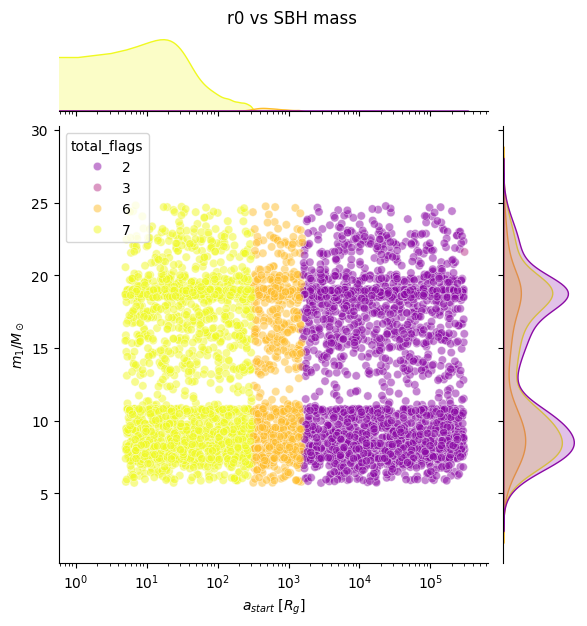

In [26]:
fig = plt.figure(figsize=(6, 6))

# Plot 3: r0 vs chi_eff
plot_with_marginals(
    fig, data,
    x="r0/Rg",
    y="m1/Msun",
    is_emri="total_flags",
    xlabel=r'$a_{start}$ [$R_g$]',
    ylabel=r'$m_1 / M_\odot$',
    title='r0 vs SBH mass',
    logx=True,
    logy=False
)

fig.tight_layout()
plt.savefig(f'{dir}/sma_sbh_{N}_SMBH_{Mbh:.1e}.pdf')
plt.show()

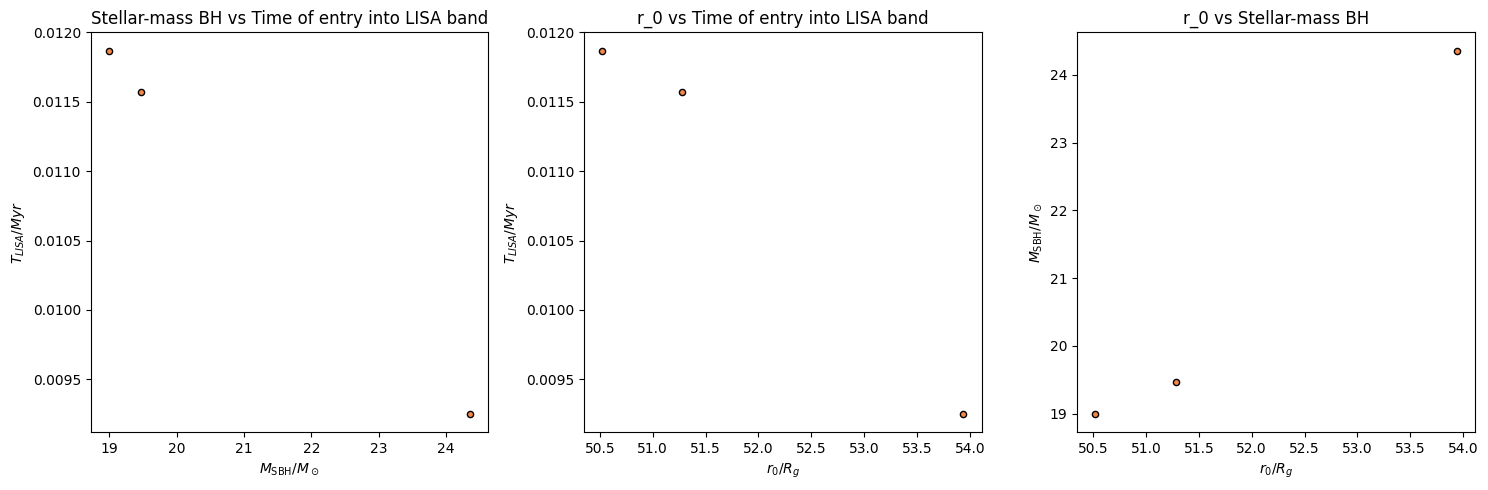

In [45]:
dried_emri_group=groups.get_group(5)['m1/Msun']
dried_emri_group1=groups.get_group(5)['t_lisa/Myr']
dried_emri_group2=groups.get_group(5)['r0/Rg']

fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=100)

i=0
axs[i].scatter(dried_emri_group, dried_emri_group1, color=colors_map[5], s=20, edgecolor="k")

axs[i].set_xlabel(r'$M_{\rm SBH} / M_\odot$')
axs[i].set_ylabel(r'$T_{LISA} / Myr$')
axs[i].set_title('Stellar-mass BH vs Time of entry into LISA band')

i=1
axs[i].scatter(dried_emri_group2, dried_emri_group1, color=colors_map[5], s=20, edgecolor="k")

axs[i].set_xlabel(r'$r_0 / R_g$')
axs[i].set_ylabel(r'$T_{LISA} / Myr$')
axs[i].set_title('r_0 vs Time of entry into LISA band')

i=2
axs[i].scatter(dried_emri_group2, dried_emri_group, color=colors_map[5], s=20, edgecolor="k")

axs[i].set_xlabel(r'$r_0 / R_g$')
axs[i].set_ylabel(r'$M_{\rm SBH} / M_\odot$')
axs[i].set_title('r_0 vs Stellar-mass BH')


plt.tight_layout()
plt.savefig(f'{dir}/summary_{N}_SMBH_{Mbh:.1e}_dried_EMRIs.pdf')
plt.show()



In [ ]:
MBH, T = np.genfromtxt("SMBHmass_local_AGNlifetime_pairs.txt", unpack=True, skip_header=3)

488426.3675200081


In [87]:
Mbh_5=file_opener(filename = "EMRIs_Jupiter_2/c_121606/SG/alpha_0.01/EMRIs_G23_1g_5000_events_with_GW.txt")
Mbh_6=file_opener(filename = "EMRIs_Jupiter_2/c_693163/SG/alpha_0.01/EMRIs_G23_1g_5000_events_with_GW.txt")
Mbh_7=file_opener(filename = "EMRIs_Jupiter_2/c_392643/SG/alpha_0.01/EMRIs_G23_1g_5000_events_with_GW.txt")
Mbh_8=file_opener(filename = "EMRIs_Jupiter_2/c_17205/SG/alpha_0.01/EMRIs_G23_1g_5000_events_with_GW.txt")

In [88]:
groups5=Mbh_5.groupby("total_flags", as_index=True)
groups6=Mbh_6.groupby("total_flags", as_index=True)
groups7=Mbh_7.groupby("total_flags", as_index=True)
groups8=Mbh_8.groupby("total_flags", as_index=True)


labels= "no inspiral or detection", "detected, no inspiral", "inspiral, no detection", "inspirals and detected"
labels= ["no inspiral, no mig w/in T_disc, no detection", 
"inspiral, no mig w/in T_disc, no detection", 
"no inspiral, mig w/in T_disc, no detection", 
"inspiral, mig w/in T_disc, no detection", 
"no inspiral, no mig w/in T_disc, detection", 
" inspiral, no mig w/in T_disc, detection", 
"no inspiral, mig w/in T_disc, detection", 
"inspiral, mig w/in T_disc, detection"]

cmap = plt.colormaps[colour]
colors_map = {0: cmap(0.), 1: cmap(1.0/7), 2: cmap(2.0/7), 3: cmap(3.0/7), 4: cmap(4.0/7), 5: cmap(5.0/7), 6: cmap(6.0/7), 7: cmap(7.0/7)}


<function matplotlib.pyplot.show(close=None, block=None)>

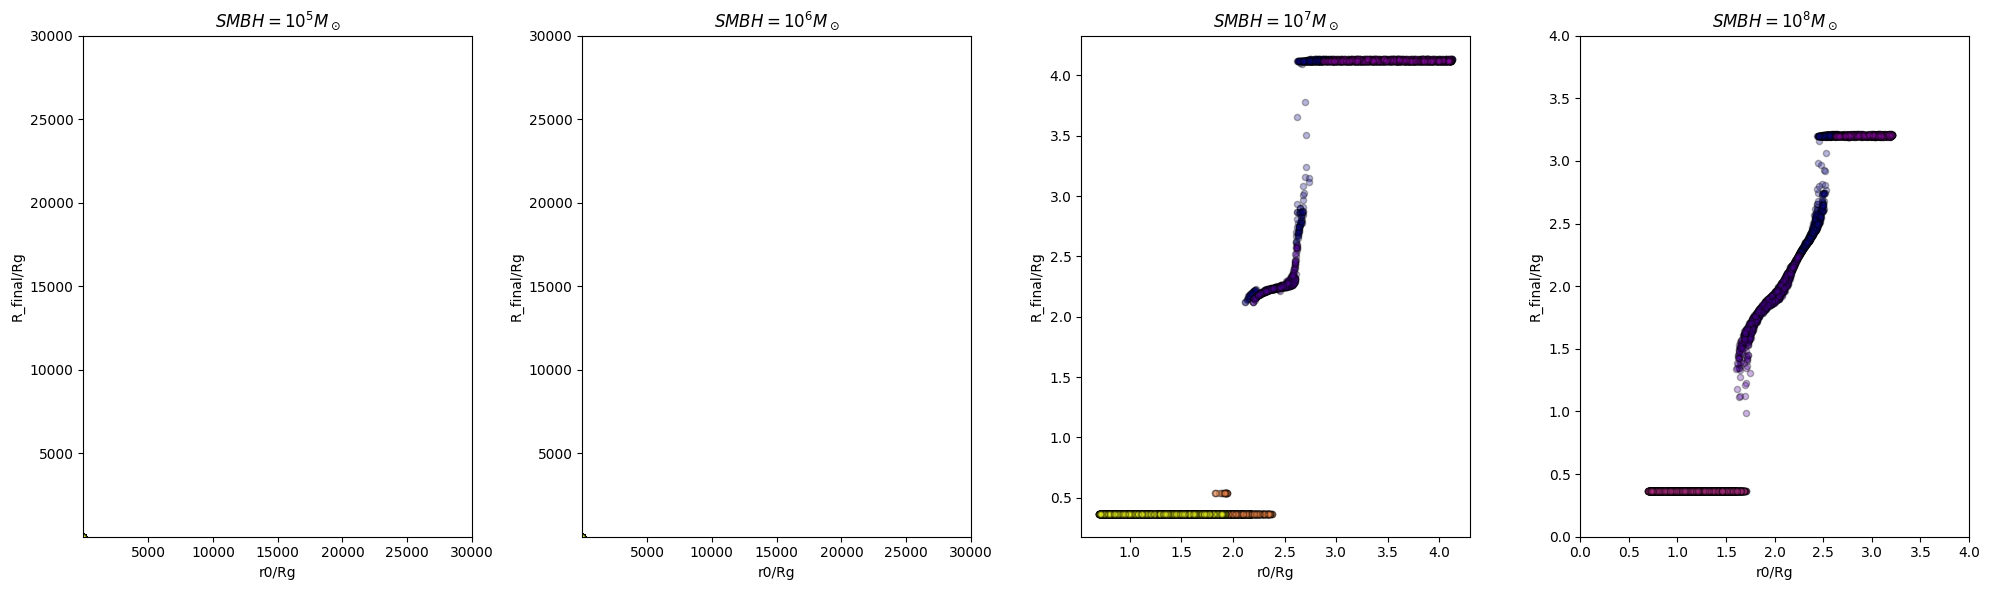

In [108]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6), dpi=100)
i=0

x="r0/Rg",
y="R_final/Rg"

for k in range(0, 8):
    try: 
        axs[i].scatter(np.log10(groups5.get_group(k)["r0/Rg"]), np.log10(groups5.get_group(k)["R_final/Rg"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

# sc2 = axs[i].scatter(t_migr, t_gw, c=data["total_flags"], cmap=colour, alpha=0.6, edgecolor='k', s=20)

axs[i].set_xlabel("r0/Rg")
axs[i].set_ylabel("R_final/Rg")
axs[i].set_title(r'$SMBH = 10^5 {M_\odot}$')
axs[i].set_xlim(1, 3e4)
axs[i].set_ylim(1, 3e4)

i=1
# t_migr = np.log10(data["t_migr/Myr"])
# t_gw = np.log10(data["t_gw/Myr"])

for k in range(0, 8):
    try: 
        axs[i].scatter(np.log10(groups6.get_group(k)["r0/Rg"]), np.log10(groups6.get_group(k)["R_final/Rg"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

# sc2 = axs[i].scatter(t_migr, t_gw, c=data["total_flags"], cmap=colour, alpha=0.6, edgecolor='k', s=20)

axs[i].set_xlabel("r0/Rg")
axs[i].set_ylabel("R_final/Rg")
axs[i].set_title(r'$SMBH = 10^6 {M_\odot}$')
axs[i].set_xlim(1, 3e4)
axs[i].set_ylim(1, 3e4)

i=2
for k in range(0, 8):
    try: 
        axs[i].scatter(np.log10(groups7.get_group(k)["r0/Rg"]), np.log10(groups7.get_group(k)["R_final/Rg"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

# sc2 = axs[i].scatter(t_migr, t_gw, c=data["total_flags"], cmap=colour, alpha=0.6, edgecolor='k', s=20)

axs[i].set_xlabel("r0/Rg")
axs[i].set_ylabel("R_final/Rg")
axs[i].set_title(r'$SMBH = 10^7 {M_\odot}$')
# axs[i].set_xlim(1, 3e3)
# axs[i].set_ylim(1, 3e3)
# axs[i].legend()

i=3
for k in range(0, 8):
    try: 
        axs[i].scatter(np.log10(groups8.get_group(k)["r0/Rg"]), np.log10(groups8.get_group(k)["R_final/Rg"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

# sc2 = axs[i].scatter(t_migr, t_gw, c=data["total_flags"], cmap=colour, alpha=0.6, edgecolor='k', s=20)

axs[i].set_xlabel("r0/Rg")
axs[i].set_ylabel("R_final/Rg")
axs[i].set_title(r'$SMBH = 10^8 {M_\odot}$')
axs[i].set_xlim(0, 4)
axs[i].set_ylim(0, 4)

plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/radii_multiple_SMBHs.pdf')

plt.show

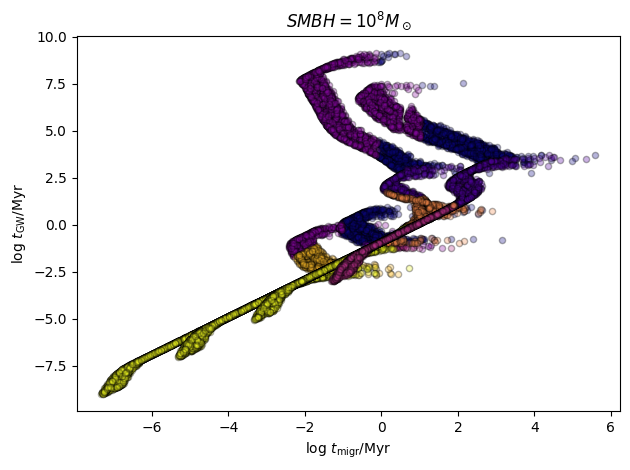

In [96]:
for k in range(0, 8):
    try: 
        plt.scatter(np.log10(groups5.get_group(k)["t_migr/Myr"]), np.log10(groups5.get_group(k)["t_gw/Myr"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

plt.xlabel(r'log $t_{\rm migr}$/Myr')
plt.ylabel(r'log $t_{\rm GW}$/Myr')
plt.title(r'$SMBH = 10^5 {M_\odot}$')

for k in range(0, 8):
    try: 
        plt.scatter(np.log10(groups6.get_group(k)["t_migr/Myr"]), np.log10(groups6.get_group(k)["t_gw/Myr"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

plt.xlabel(r'log $t_{\rm migr}$/Myr')
plt.ylabel(r'log $t_{\rm GW}$/Myr')
plt.title(r'$SMBH = 10^6 {M_\odot}$')

for k in range(0, 8):
    try: 
        plt.scatter(np.log10(groups7.get_group(k)["t_migr/Myr"]), np.log10(groups7.get_group(k)["t_gw/Myr"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

plt.xlabel(r'log $t_{\rm migr}$/Myr')
plt.ylabel(r'log $t_{\rm GW}$/Myr')
plt.title(r'$SMBH = 10^7 {M_\odot}$')

for k in range(0, 8):
    try: 
        plt.scatter(np.log10(groups8.get_group(k)["t_migr/Myr"]), np.log10(groups8.get_group(k)["t_gw/Myr"]), color=colors_map[k],
                   label=labels[k],
                   s=20, alpha=0.3, edgecolor="k")
    except KeyError:
        pass

# sc2 = axs[i].scatter(t_migr, t_gw, c=data["total_flags"], cmap=colour, alpha=0.6, edgecolor='k', s=20)

plt.xlabel(r'log $t_{\rm migr}$/Myr')
plt.ylabel(r'log $t_{\rm GW}$/Myr')
plt.title(r'$SMBH = 10^8 {M_\odot}$')

plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/summary_multiple_SMBHs_2.pdf')
plt.show()


In [163]:
MBH, T = np.genfromtxt("SMBHmass_local_AGNlifetime_pairs.txt", unpack=True, skip_header=3)

In [2]:
lowest_mass=MBH[0]

for i in range (0, len(MBH)):
    mdiff=lowest_mass-MBH[i]
    if mdiff>0:
        print(f'new lowest mass! {MBH[i]} MSun')
        lowest_mass=MBH[i]

print(lowest_mass)

NameError: name 'MBH' is not defined

In [1]:
for i in range(0, len(MBH)):
    if 4.999e4<MBH[i]<5.001e4:
        print(f'{i}: {MBH[i]:1e}')


NameError: name 'MBH' is not defined